In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split


In [255]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In [256]:
credit_default=pd.read_csv("cleaned_cerditcard.csv")

In [257]:
credit_default.head()

,Unnamed: 0,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,grad_school,university,high_school,male,married
0,0,20000,24,2,2,0,0,0,0,3913,...,0,0,0,0,1,0,1,0,0,1
1,1,120000,26,0,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,1,0,0,0
2,2,90000,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,0,1,0,0,0
3,3,50000,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,0,1,0,0,1
4,4,50000,57,0,0,0,0,0,0,8617,...,10000,9000,689,679,0,0,1,0,1,1


In [258]:
credit_default = credit_default.drop(credit_default.columns[[0]], axis=1)


In [259]:
credit_default.head()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,grad_school,university,high_school,male,married
0,20000,24,2,2,0,0,0,0,3913,3102,...,0,0,0,0,1,0,1,0,0,1
1,120000,26,0,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,1,0,1,0,0,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,0,0,1,0,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,0,0,1,0,0,1
4,50000,57,0,0,0,0,0,0,8617,5670,...,10000,9000,689,679,0,0,1,0,1,1


In [260]:
credit_default.columns

Index(['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'default', 'grad_school',
       'university', 'high_school', 'male', 'married'],
      dtype='object')

In [261]:
credit_default.shape

(30000, 26)

In [262]:
X= credit_default.drop('default', axis=1)

In [263]:
X.head()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,grad_school,university,high_school,male,married
0,20000,24,2,2,0,0,0,0,3913,3102,...,689,0,0,0,0,0,1,0,0,1
1,120000,26,0,2,0,0,0,2,2682,1725,...,1000,1000,1000,0,2000,0,1,0,0,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1500,1000,1000,1000,5000,0,1,0,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,2019,1200,1100,1069,1000,0,1,0,0,1
4,50000,57,0,0,0,0,0,0,8617,5670,...,36681,10000,9000,689,679,0,1,0,1,1


In [264]:
traget_name = 'default'


In [265]:
y= credit_default[traget_name]

In [266]:
y

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64

In [267]:
train_data_x, test_data_x, train_data_y, test_data_y =\
train_test_split(X,y, train_size=0.5, test_size=0.5, random_state=0)

In [268]:
train_data_x

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,grad_school,university,high_school,male,married
4943,70000,25,0,0,0,0,0,0,22935,23963,...,1414,1100,1104,1000,1155,0,1,0,0,0
29677,20000,34,0,0,0,0,0,0,16912,-2,...,0,0,310,9500,800,0,1,0,1,0
10145,400000,31,1,0,0,0,0,0,-166,-490,...,30001,2128,3009,8006,1028,1,0,0,1,0
3714,30000,41,0,0,0,0,0,0,29866,30900,...,0,0,0,0,0,0,1,0,1,1
5862,180000,26,0,0,0,0,0,0,10874,9324,...,2000,2000,3109,5000,5520,0,1,0,0,0
19806,200000,42,0,0,0,0,0,0,25897,33587,...,15000,20000,20000,15000,20000,0,1,0,0,1
19907,80000,44,0,0,0,0,0,0,3995,2045,...,824,0,1000,0,0,0,1,0,0,1
13637,90000,26,0,0,2,0,0,0,87561,92996,...,0,1527,1617,1490,659,0,1,0,0,0
4996,180000,34,0,0,0,0,0,0,6892,6892,...,6892,6282,2000,0,0,0,0,0,0,1
10713,70000,23,0,0,0,2,0,0,18285,16903,...,2332,0,365,364,527,0,1,0,0,0


In [327]:
train_data_x.columns

Index(['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'grad_school', 'university',
       'high_school', 'male', 'married'],
      dtype='object')

In [403]:
train_data_y

4943     0
29677    0
10145    0
3714     0
5862     0
19806    0
19907    0
13637    0
4996     0
10713    1
338      1
22573    0
26199    0
26930    1
29702    0
16123    0
22562    0
10764    0
26755    0
22493    0
14159    1
1692     0
23873    0
9685     0
6132     1
25564    0
20575    0
11493    0
25227    0
18038    0
        ..
2163     0
6036     0
6921     0
6216     0
27469    0
16921    0
26277    0
2897     0
24152    0
18606    1
10327    0
18983    0
17089    0
14650    0
19852    0
6744     1
15832    0
15430    0
14935    0
14116    0
22258    0
20757    1
24275    0
9225     0
21243    0
13123    0
19648    1
9845     0
10799    0
2732     0
Name: default, Length: 15000, dtype: int64

In [440]:
model = Sequential()

In [441]:
#input Layer
model.add(Dense(30, input_shape=(25,), name='Input_Layer', activation='relu'))

In [442]:
# Output Layer
model.add(Dense(2, name='Output_Layer', activation='softmax'))

In [443]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 30)                780       
_________________________________________________________________
Output_Layer (Dense)         (None, 2)                 62        
Total params: 842
Trainable params: 842
Non-trainable params: 0
_________________________________________________________________


In [444]:
# compile
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [445]:
#model.fit(train_data_x, train_data_y, epochs=80, batch_size=, verbose=1)
model.fit(train_data_x, train_data_y,  epochs=120, batch_size=16, verbose=1)

Epoch 1/120
15000/15000 [==============================] - 1s 76us/step - loss: 12.4722 - acc: 0.2262
Epoch 2/120
15000/15000 [==============================] - 1s 51us/step - loss: 12.4722 - acc: 0.2262
Epoch 3/120
15000/15000 [==============================] - 1s 51us/step - loss: 12.4722 - acc: 0.2262
Epoch 4/120
15000/15000 [==============================] - 1s 51us/step - loss: 12.4722 - acc: 0.2262
Epoch 5/120
15000/15000 [==============================] - 1s 52us/step - loss: 12.4722 - acc: 0.2262
Epoch 6/120
15000/15000 [==============================] - 1s 52us/step - loss: 12.4722 - acc: 0.2262
Epoch 7/120
15000/15000 [==============================] - 1s 52us/step - loss: 12.4722 - acc: 0.2262
Epoch 8/120
15000/15000 [==============================] - 1s 52us/step - loss: 12.4722 - acc: 0.2262
Epoch 9/120
15000/15000 [==============================] - 1s 52us/step - loss: 12.4722 - acc: 0.2262
Epoch 10/120
15000/15000 [==============================] - 1s 59us/step - loss: 1

15000/15000 [==============================] - 1s 56us/step - loss: 12.4722 - acc: 0.2262
Epoch 81/120
15000/15000 [==============================] - 1s 55us/step - loss: 12.4722 - acc: 0.2262
Epoch 82/120
15000/15000 [==============================] - 1s 53us/step - loss: 12.4722 - acc: 0.2262
Epoch 83/120
15000/15000 [==============================] - 1s 52us/step - loss: 12.4722 - acc: 0.2262
Epoch 84/120
15000/15000 [==============================] - 1s 51us/step - loss: 12.4722 - acc: 0.2262
Epoch 85/120
15000/15000 [==============================] - 1s 56us/step - loss: 12.4722 - acc: 0.2262
Epoch 86/120
15000/15000 [==============================] - 1s 55us/step - loss: 12.4722 - acc: 0.2262
Epoch 87/120
15000/15000 [==============================] - 1s 60us/step - loss: 12.4722 - acc: 0.2262
Epoch 88/120
15000/15000 [==============================] - 1s 52us/step - loss: 12.4722 - acc: 0.2262
Epoch 89/120
15000/15000 [==============================] - 1s 51us/step - loss: 12.47

In [446]:
loss, accuracy = model.evaluate(test_data_x, test_data_y, verbose=0)

In [447]:
print("Loss={:.2f}".format(loss))

Loss=12.58


In [448]:
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.22


# Model2

In [449]:
input_dim = train_data_x.shape[1]

model2 = Sequential()
model2.add(Dense(256, input_shape=(input_dim,), activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='sigmoid'))
model2.add(Dense(1,  activation='sigmoid'))

In [450]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 30)                780       
_________________________________________________________________
Output_Layer (Dense)         (None, 2)                 62        
Total params: 842
Trainable params: 842
Non-trainable params: 0
_________________________________________________________________


In [451]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [456]:
# history = model.fit(
#               np.array(train_data_x), np.array(train_data_y),
#               batch_size=25, epochs=5, verbose=1, callbacks=[bl],
#               validation_data=(np.array(test_data_x), np.array(test_data_y)))

In [453]:
activations = model.predict_on_batch(np.array(test_data_x))

In [454]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=25, verbose=0, n_iter=500, random_state=1337)
samples = tsne.fit_transform(activations)

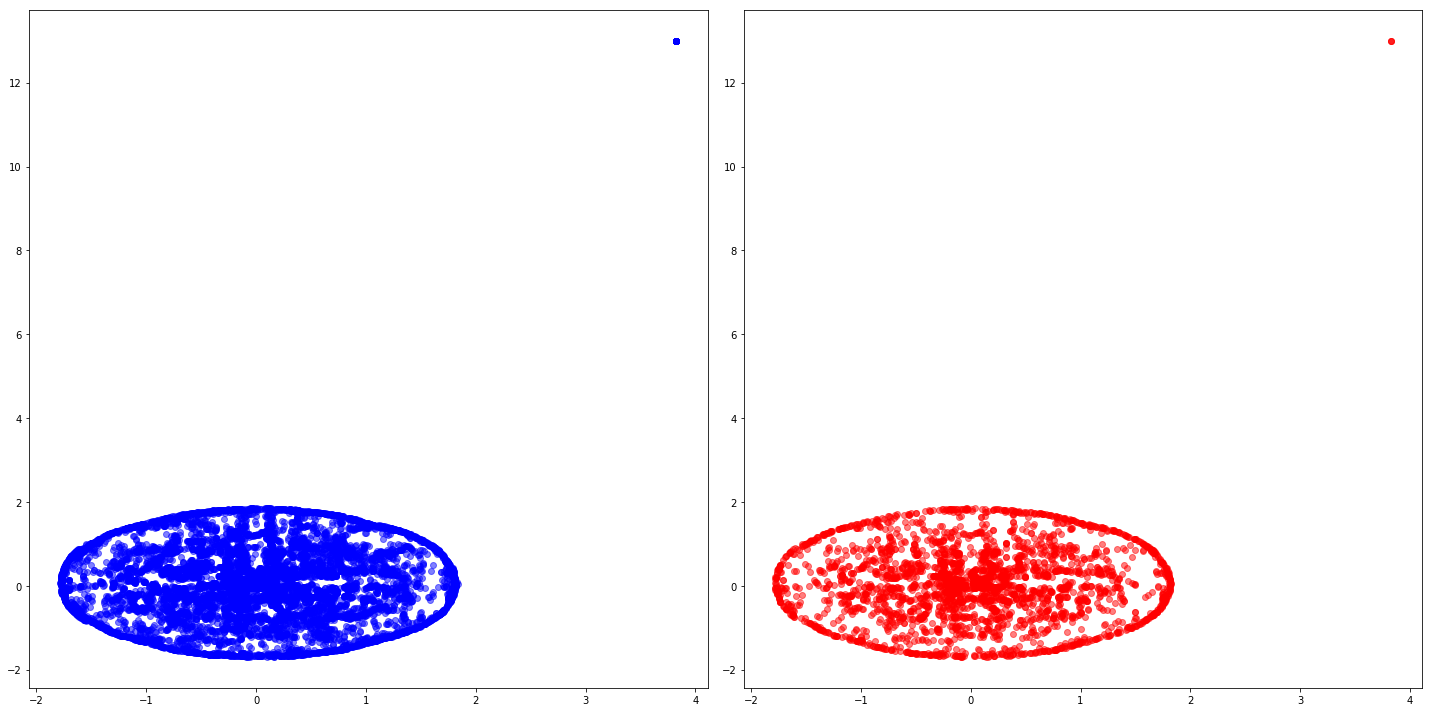

In [455]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(20,10)

ax[0].scatter(*samples[test_data_y==0].T,color='b', alpha=0.5, label='default: NO')
ax[1].scatter(*samples[test_data_y==1].T,color='r', alpha=0.5, label='default: YES')
plt.tight_layout()
plt.show()

In [373]:
plot_model(model, to_file='model.png')